In [1]:
pip install ucimlrepo

In [5]:
#First two steps are to bring in the data from the referenced website
from ucimlrepo import fetch_ucirepo

national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)

X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets

print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.metadata)

print(national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.variables)

{'uci_id': 887, 'name': 'National Health and Nutrition Health Survey 2013-2014 (NHANES) Age Prediction Subset', 'repository_url': 'https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset', 'data_url': 'https://archive.ics.uci.edu/static/public/887/data.csv', 'abstract': "The National Health and Nutrition Examination Survey (NHANES), administered by the Centers for Disease Control and Prevention (CDC), collects extensive health and nutritional information from a diverse U.S. population. Though expansive, the dataset is often too broad for specific analytical purposes. In this sub-dataset, we narrow our focus to predicting respondents' age by extracting a subset of features from the larger NHANES dataset. These selected features include physiological measurements, lifestyle choices, and biochemical markers, which were hypothesized to have strong correlations with age.", 'area': 'Health and Medicine', 'tasks': ['Classifi

In [6]:
import pandas as pd
import numpy as np

In [7]:
#Create a dataframe with Features and Targets
national = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset

In [8]:
df = pd.DataFrame(national.data.features)

In [9]:
df = df.assign(age_group=national.data.targets)

In [10]:
df = df.assign(RIDAGEYR=national.data.targets)

In [11]:
#Index the insulin levels to create a new column with assigned labels based off the value in the insulin column
df['Category'] = pd.cut(df['LBXIN'],
                        bins=[0, 10, 15, 30, 110],
                        labels=['Low', 'Medium', 'High', 'Very High'],
                        right=False,
                        include_lowest=True)

In [12]:
df.head()


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,RIDAGEYR,Category
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,Adult,Medium
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,Adult,Low
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,Adult,Low
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult,Adult,High
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,Adult,Medium


In [13]:
#Using Label encoding to change Adult and Senior into 1 and 2 for the decision tree
d = {'Adult': 1, 'Senior': 2}
df['age_group'] = df['age_group'].map(d)
df['RIDAGEYR'] = df['RIDAGEYR'].map(d)
print(df)

      RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN  age_group  RIDAGEYR Category
0          2.0     2.0    35.7   110.0     2.0   150.0  14.91          1         1   Medium
1          2.0     2.0    20.3    89.0     2.0    80.0   3.85          1         1      Low
2          1.0     2.0    23.2    89.0     2.0    68.0   6.14          1         1      Low
3          1.0     2.0    28.9   104.0     2.0    84.0  16.15          1         1     High
4          2.0     1.0    35.9   103.0     2.0    81.0  10.92          1         1   Medium
...        ...     ...     ...     ...     ...     ...    ...        ...       ...      ...
2273       2.0     2.0    33.5   100.0     2.0    73.0   6.53          1         1      Low
2274       1.0     2.0    30.0    93.0     2.0   208.0  13.02          1         1   Medium
2275       1.0     2.0    23.7   103.0     2.0   124.0  21.41          1         1     High
2276       2.0     2.0    27.4    90.0     2.0   108.0   4.99          1        

In [14]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [16]:
#To give more familar names to the column headers
df.rename(columns={'RIAGENDR': 'Gender', 'PAQ605': 'Exercise', 'BMXBMI': 'BMI', 'LBXGLU': 'Glucose', 'DIQ010': 'Diabetic', 'LBXGLT': 'Oral_Glucose', 'RIDAGEYR': 'Age', 'LBXIN': 'Insulin', 'Category': 'Insulin_Category'}, inplace=True)

In [17]:
print(df)

      Gender  Exercise   BMI  Glucose  ...  Insulin  age_group  Age  Insulin_Category
0        2.0       2.0  35.7    110.0  ...    14.91          1    1            Medium
1        2.0       2.0  20.3     89.0  ...     3.85          1    1               Low
2        1.0       2.0  23.2     89.0  ...     6.14          1    1               Low
3        1.0       2.0  28.9    104.0  ...    16.15          1    1              High
4        2.0       1.0  35.9    103.0  ...    10.92          1    1            Medium
...      ...       ...   ...      ...  ...      ...        ...  ...               ...
2273     2.0       2.0  33.5    100.0  ...     6.53          1    1               Low
2274     1.0       2.0  30.0     93.0  ...    13.02          1    1            Medium
2275     1.0       2.0  23.7    103.0  ...    21.41          1    1              High
2276     2.0       2.0  27.4     90.0  ...     4.99          1    1               Low
2277     1.0       2.0  24.5    108.0  ...     3.76   

In [19]:
#Using Z-Score to detect outlier and then remove them from columns Glucose, BMI and Oral Glucose
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Glucose']))
print(z)

0       0.584085
1       0.590024
2       0.590024
3       0.248625
4       0.192715
          ...   
2273    0.024985
2274    0.366384
2275    0.192715
2276    0.534114
2277    0.472265
Name: Glucose, Length: 2278, dtype: float64


In [20]:
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (2278, 10)
DataFrame Shape after Removing Outliers: (2237, 10)


In [21]:
z = np.abs(stats.zscore(no_outliers['BMI']))
print(z)

0       1.092822
1       1.050235
2       0.646672
3       0.146537
4       1.120654
          ...   
2273    0.786671
2274    0.299613
2275    0.577092
2276    0.062202
2277    0.465765
Name: BMI, Length: 2237, dtype: float64


In [22]:
threshold_z = 2

outlier_indices = no_outliers[z > threshold_z].index
no_outliers2 = no_outliers.drop(outlier_indices)
print("Original DataFrame Shape:", no_outliers.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers2.shape)

Original DataFrame Shape: (2237, 10)
DataFrame Shape after Removing Outliers: (2132, 10)


In [23]:
z = np.abs(stats.zscore(no_outliers2['Oral_Glucose']))
print(z)

0       1.016329
1       0.825439
2       1.141170
3       0.720195
4       0.799128
          ...   
2273    1.009616
2274    2.542365
2275    0.332244
2276    0.088732
2277    0.088732
Name: Oral_Glucose, Length: 2132, dtype: float64


In [24]:
threshold_z = 2

outlier_indices = no_outliers2[z > threshold_z].index
df = no_outliers2.drop(outlier_indices)
print("Original DataFrame Shape:", no_outliers2.shape)
print("DataFrame Shape after Removing Outliers:", df.shape)

Original DataFrame Shape: (2132, 10)
DataFrame Shape after Removing Outliers: (2032, 10)


In [27]:
print(df)

      Gender  Exercise   BMI  Glucose  ...  Insulin  age_group  Age  Insulin_Category
0        2.0       2.0  35.7    110.0  ...    14.91          1    1            Medium
1        2.0       2.0  20.3     89.0  ...     3.85          1    1               Low
2        1.0       2.0  23.2     89.0  ...     6.14          1    1               Low
3        1.0       2.0  28.9    104.0  ...    16.15          1    1              High
4        2.0       1.0  35.9    103.0  ...    10.92          1    1            Medium
...      ...       ...   ...      ...  ...      ...        ...  ...               ...
2272     1.0       2.0  22.5     98.0  ...     3.51          1    1               Low
2273     2.0       2.0  33.5    100.0  ...     6.53          1    1               Low
2275     1.0       2.0  23.7    103.0  ...    21.41          1    1              High
2276     2.0       2.0  27.4     90.0  ...     4.99          1    1               Low
2277     1.0       2.0  24.5    108.0  ...     3.76   

In [28]:
#Assign the features for the decision tree (with no outliers)
features = ['Gender', 'Exercise', 'BMI', 'Glucose', 'Diabetic', 'Oral_Glucose', 'Age', 'Insulin']

In [29]:
#create the testing and training sets
X = df[features]
Y = df['Insulin_Category']

[Text(0.3333333333333333, 0.875, 'Insulin <= 10.0\ngini = 0.579\nsamples = 2032\nvalue = [329, 1197, 439, 67]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1197\nvalue = [0, 1197, 0, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'Insulin <= 15.005\ngini = 0.562\nsamples = 835\nvalue = [329, 0, 439, 67]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 439\nvalue = [0, 0, 439, 0]'),
 Text(0.6666666666666666, 0.375, 'Insulin <= 29.94\ngini = 0.281\nsamples = 396\nvalue = [329, 0, 0, 67]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 329\nvalue = [329, 0, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 67\nvalue = [0, 0, 0, 67]')]

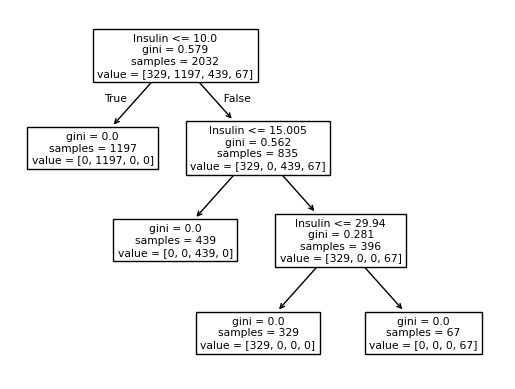

In [30]:
#run the decision tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)